<center><H3> DAB304 Healthcare Analytics  </center>
<center><H4> Group 09 - SECTION 002 </center>



<center><H2> Heart Failure Prediction using Machine Learning </center>

In [1]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 13.8 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd # for dataframes
import datetime as dt
import numpy as np
import pandas as pd

#hide warning
import warnings
warnings.filterwarnings("ignore")

# for plotting graphs
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

#models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, PrecisionRecallDisplay, RocCurveDisplay, accuracy_score, confusion_matrix, ConfusionMatrixDisplay




In [3]:
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [4]:
hf = pd.read_csv('heart_failure_clinical_records_dataset.csv', encoding= 'ISO-8859-1')                     #encoding='latin-1'

In [5]:
hf.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
hf.shape

(299, 13)

In [7]:
hf = hf.rename(columns={'DEATH_EVENT': 'alive'})
sniff_modified(hf)

,data type,percent missing,No. unique,unique values
anaemia,int64,0.0,2,"[0, 1]"
creatinine_phosphokinase,int64,0.0,208,"[582, 7861, 146, 111, 160, 47, 246, 315, 157, ..."
diabetes,int64,0.0,2,"[0, 1]"
ejection_fraction,int64,0.0,17,"[20, 38, 40, 15, 60, 65, 35, 25, 30, 50, 14, 5..."
high_blood_pressure,int64,0.0,2,"[1, 0]"
serum_sodium,int64,0.0,27,"[130, 136, 129, 137, 116, 132, 131, 138, 133, ..."
sex,int64,0.0,2,"[1, 0]"
smoking,int64,0.0,2,"[0, 1]"
time,int64,0.0,148,"[4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 20, 2..."
alive,int64,0.0,2,"[1, 0]"


- ##### All attributes have 299 non-null values, so there are no missing values.
- ##### The datatype is also 'float64' or 'int64,' which works well when fed into an algorithm.

### Age Distribution

In [8]:
hist_data =[hf["age"].values]
group_labels = ['age'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')


fig.show()

##### In the graph above, those between the ages of 40 and 80 are widely spread out, while those under 40 and over 80 are hardly represented.

#### Age Distribution by Gender

In [9]:
fig = px.box(hf, x='sex', y='age', points="all",boxmode="overlay",notched=True)
fig.update_layout(
    title_text="Age Distribution by Gender [Male = 1 | Female = 0]")
fig.show()

### Death Analysis

[Text(0, 0, '203'), Text(0, 0, '96')]

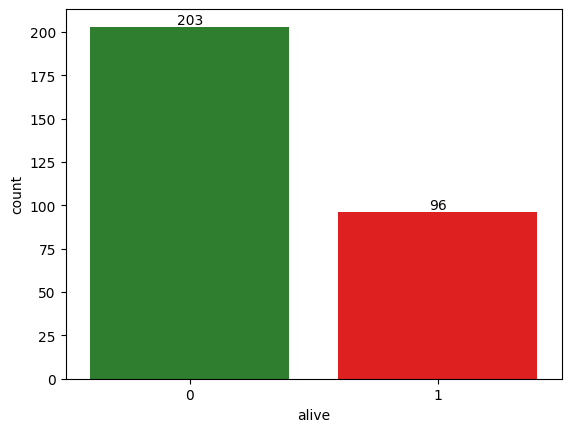

In [10]:
#Evaluating the target and finding out the potential skewness in the data
cols= ["#228B22","#FF0000"]
ax = sns.countplot(x= hf["alive"], palette= cols)
ax.bar_label(ax.containers[0])

#### Death Analysis for `sex`

In [11]:
male = hf[hf["sex"]==1]
female = hf[hf["sex"]==0]

male_al = male[hf["alive"]==0]
male_dd = male[hf["alive"]==1]
female_al = female[hf["alive"]==0]
female_dd = female[hf["alive"]==1]

labels = ['Male - Alive',
          'Male - Dead', 
          'Female -  Alive',
          'Female - Dead']

values = [len(male[hf["alive"]==0]),
          len(male[hf["alive"]==1]),
          len(female[hf["alive"]==0]),
          len(female[hf["alive"]==1])]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
colors = ['#4eaf4e', '#E41B17', '#4eaf4e', '#E41B17']
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text="Dead Analysis for Gender")
fig.show()

#### Death Analysis for `age`

In [12]:
al = hf[hf["alive"]==0]["age"]
not_al = hf[hf["alive"]==1]["age"]
hist_data = [al,not_al]
group_labels = ['Alive', 'Dead']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5,colors=['#4eaf4e', '#E41B17'])
fig.show()

##### Most of the survivors of heart attacks are between the ages of 40 and 70, as can be seen in this picture. Moreover, it is demoralising that death events occur to people of all ages.

#### Death Analysis for `age` and `sex`

In [13]:
fig = px.violin(hf, y="age", x="sex", color="alive", box=True, points="all", hover_data=hf.columns, color_discrete_sequence=['#4eaf4e', '#E41B17'])
fig.update_layout(title_text="Death Analysis for Age and Gender")

##### Ages between 40 and 70 have a high rate of surviving. Males and females, 50 to 60 and 60 to 70 years old, respectively, both survived heart disease.

### Analysis on __`diabetes`__

In [14]:
labels = ['No Diabetes','Diabetes']
diabetes_yes = hf[hf['diabetes']==1]
diabetes_no = hf[hf['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analysis on Diabetes")
color1 = ['sky blue', 'orange']
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=color1, line=dict(color='#000000', width=2)))
fig.show()

__According to the aforementioned pie chart, 58.2% (174) of the people in our dataset do not have diabetes, and 41.8% (125) of them do.__

In [15]:
diabetes_yes_survi = diabetes_yes[hf["alive"]==0]
diabetes_yes_not_survi = diabetes_yes[hf["alive"]==1]
diabetes_no_survi = diabetes_no[hf["alive"]==0]
diabetes__no_not_survi = diabetes_no[hf["alive"]==1]

labels = ['Diabetes Yes - Survived','Diabetes Yes - Not Survived', 'Diabetes NO - Survived', 'Diabetes NO - Not Survived']
values = [len(diabetes_yes[hf["alive"]==0]),len(diabetes_yes[hf["alive"]==1]),
         len(diabetes_no[hf["alive"]==0]),len(diabetes_no[hf["alive"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analysis on Survival - Diabetes")
colors = ['#4eaf4e', '#E41B17', '#4eaf4e', '#E41B17']
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

__From the aforementioned pie charts, we may deduce that in our dataset, 118 of the 174 non-diabetic individuals with diabetes lived, while 56 did not, and 85 of the 125 individuals with diabetes survived, while 40 did not.__

### Analysis on __`anaemia`__

In [16]:
anaemia_yes = hf[hf['anaemia']==1]
anaemia_no = hf[hf['anaemia']==0]

labels = ['No Anaemia', 'Anaemia']
values = [len(anaemia_no), len(anaemia_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
title_text="Analysis on - Anaemia")
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=color1, line=dict(color='#000000', width=2)))
fig.show()

__According to the pie chart above, 56.9%(170) of the pepoles in our dataset are non-anaemic, while 43.1%(129) are anaemic.__

In [17]:
anaemia_yes_survi = anaemia_yes[hf["alive"]==0]
anaemia_yes_not_survi = anaemia_yes[hf["alive"]==1]
anaemia_no_survi = anaemia_no[hf["alive"]==0]
anaemia_no_not_survi = anaemia_no[hf["alive"]==1]

labels = ['Anaemia Yes - Survived','Anaemia Yes - Not Survived', 'Anaemia No - Survived', 'Anaemia NO - Not Survived']
values = [len(anaemia_yes[hf["alive"]==0]),len(anaemia_yes[hf["alive"]==1]),
         len(anaemia_no[hf["alive"]==0]),len(anaemia_no[hf["alive"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analysis on Survival - Anaemia")
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

__Based on the pie charts above, we can conclude that in our dataset of 170 non-anemic people, 120 survived and 50 did not and 83 of the 129 anaemic people survived, while 46 did not.__

### Analysis on __`high_blood_pressure`__

In [18]:
hbp_yes = hf[hf['high_blood_pressure']==1]
hbp_no = hf[hf['high_blood_pressure']==0]

labels = ["No High BP","High BP"]
values = [len(hbp_no), len(hbp_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analysis on - High Blood Pressure")
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=color1, line=dict(color='#000000', width=2)))
fig.show()

__According to the above pie chart, 64.9%(194) of our dataset's pepoles are Non High BP, while 35.1%(105) are High BP.__

In [19]:
hbp_yes_survi = hbp_yes[hf["alive"]==0]
hbp_yes_not_survi = hbp_yes[hf["alive"]==1]
hbp_no_survi = hbp_no[hf["alive"]==0]
hbp_no_not_survi = hbp_no[hf["alive"]==1]

labels = ['HBP Yes - Survived','HBP Yes - Not Survived', 'HBP No - Survived', 'HBP NO - Not Survived']
values = [len(hbp_yes[hf["alive"]==0]),len(hbp_yes[hf["alive"]==1]),
         len(hbp_no[hf["alive"]==0]),len(hbp_no[hf["alive"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analysis on Survival - HBP(high blood pressure)")
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

__Based on the pie charts above, we can conclude that in our dataset, diabetes affects 137 of 194 non-high blood pressure people, while 57 do not 66 people with high blood pressure survived, while 39 did not.__

In [20]:
smoking_yes = hf[hf['smoking']==1]
smoking_no = hf[hf['smoking']==0]

labels = ['No Smoking','Smoking']
values = [len(smoking_no), len(smoking_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analysis on - Smoking")
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=color1, line=dict(color='#000000', width=2)))
fig.show()

__According to the above pie chart, 67.9%(203) of the people in our dataset are nonsmokers, while 32.1%(96) are smokers.__

In [21]:
smoking_yes_survi = smoking_yes[hf["alive"]==0]
smoking_yes_not_survi = smoking_yes[hf["alive"]==1]
smoking_no_survi = smoking_no[hf["alive"]==0]
smoking_no_not_survi = smoking_no[hf["alive"]==1]

labels = ['Smoking Yes - Survived','Smoking Yes - Not Survived', 'Smoking No - Survived', 'Smoking NO- Not Survived']
values = [len(smoking_yes[hf["alive"]==0]),len(smoking_yes[hf["alive"]==1]),
         len(smoking_no[hf["alive"]==0]),len(smoking_no[hf["alive"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analysis on Survival - Smoking")
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

__Based on the pie charts above, we can conclude that in our dataset, diabetes affects 137 of 203 nonsmokers, while 66 do not Sixty-six of the 96 smokers survived, while 30 did not.__

### Analysis in __`serum_sodium`__

In [22]:
surv = hf[hf['alive']==0]['serum_sodium']
not_surv = hf[hf['alive']==1]['serum_sodium']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(title_text="Analysis in Serum Sodium on Survival Status")
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5,colors=['#4eaf4e', '#E41B17'])
fig.show()

### Analysis on __`serum_creatinine`__

In [23]:
surv = hf[hf['alive']==0]['serum_creatinine']
not_surv = hf[hf['alive']==1]['serum_creatinine']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(title_text="Analysis in Serum Creatinine on Survival Status")
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5,colors=['#4eaf4e', '#E41B17'])
fig.show()


### Analysis on __`ejection_fraction`__

In [24]:
surv = hf[hf['alive']==0]['ejection_fraction']
not_surv = hf[hf['alive']==1]['ejection_fraction']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(title_text="Analysis in Ejaction Fraction on Survival Status")
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5,colors=['#4eaf4e', '#E41B17'])
fig.show()

### Analysis on __`creatinine_phosphokinase`__

In [25]:
surv = hf[hf['alive']==0]['creatinine_phosphokinase']
not_surv = hf[hf['alive']==1]['creatinine_phosphokinase']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(title_text="Analysis in Serum Sodium on Survival Status")
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5,colors=['#4eaf4e', '#E41B17'])
fig.show()

__For creatinine phosphokinase values ranging from 0 to 500, death cases are increasing.__

### EDA Summary


(1) __`age`__ - years

__age group__     __spread__      __count__

40 - 50    ->   24.7%       [74]
50 - 60    ->   29.4%       [88]
60 - 70    ->   28.4%       [85]
70 <         ->   17.4%       [52]

__Additionally, we can see that the average age is around 61 years old, with the minimum and maximum ages being 40 and 95 respectively.__


(2) __`sex`__ - binary

Male       64.8%
Female   35.1%

(3) __`anemia`__ -  _**Red blood cell or haemoglobin deficiency (boolean)**_

no anaemia    56.9%
anaemia         43.1%

(4) __`creatinine_phosphokinase`__ - _**Level of the CPK enzyme in the blood (mcg/L)**_

Mean Level:     approximately 581.8 (mcg/L)
Minimum:                                       23 (mcg/L) 
Maximum:                                  7861 (mcg/L).

(5) __`diabetes`__ - _**If the patient has diabetes (boolean)**_

no diabetes    49.2%
diabetes         41.8%

(6) __`ejection_fraction`__ - _**Percentage of blood leaving the heart at each contraction (percentage)**__

Mean ejection_fraction: approximately 38 
Minimum:                                                 14
Maximum:                                                80

We've also seen that the majority of blood leaving the heart at each contraction is between 30 and 40%.

(7) __`high_blood_pressure`__ - _**If the patient has hypertension (boolean)**_
no hypertension    64.9%
hypertension         36.1%

(8) __`platelets`__ - _**Platelets in the blood (kiloplatelets/mL)**_

Mean Platelets: approximately 263358 (kiloplatelets/mL)
Minimum:                                     25100 (kiloplatelets/mL)
Maximum:                                     850000 (kiloplatelets/mL).

We also discovered that the majority of Platelets in the blood range between 200000 and 350000 (kiloplatelets/mL).

(9) __`serum_creatinine`__ - _**Level of serum creatinine in the blood (mg/dL)**_
Mean Level of serum creatinine: approximately 1.3 (mg/dL)
Minimum:                                                               0.5 (mg/dL)
Maximum:                                                              9.4 (mg/dL)

(10) __`serum_sodium`__ - _**Level of serum sodium in the blood (mEq/L)**_
Mean Level of serum: approximately 136.6 (mEq/L) 
Minimum:                                                 113 (mEq/L)
Maximum:                                                148 (mEq/L)
We also discovered that the majority of serum sodium levels in the blood are between 135 and 140 (mEq/L).

(11) __`smoking`__ - _**If the patient smokes or not (boolean)*_

Non Smokers    67.9%
Smokers            33.1%

(12) __`time`__ - _**Follow-up period (days)**_

Mean time: approximately 130.2 (days) 
Minimum:                                    4 (days) 
Maximum:                               285 (days)

(13) __`alive`__  - _**If the patient deceased during the follow-up period (boolean)**_

Survived         67.9%
Not Survived  34.1%

### Feature Engineering

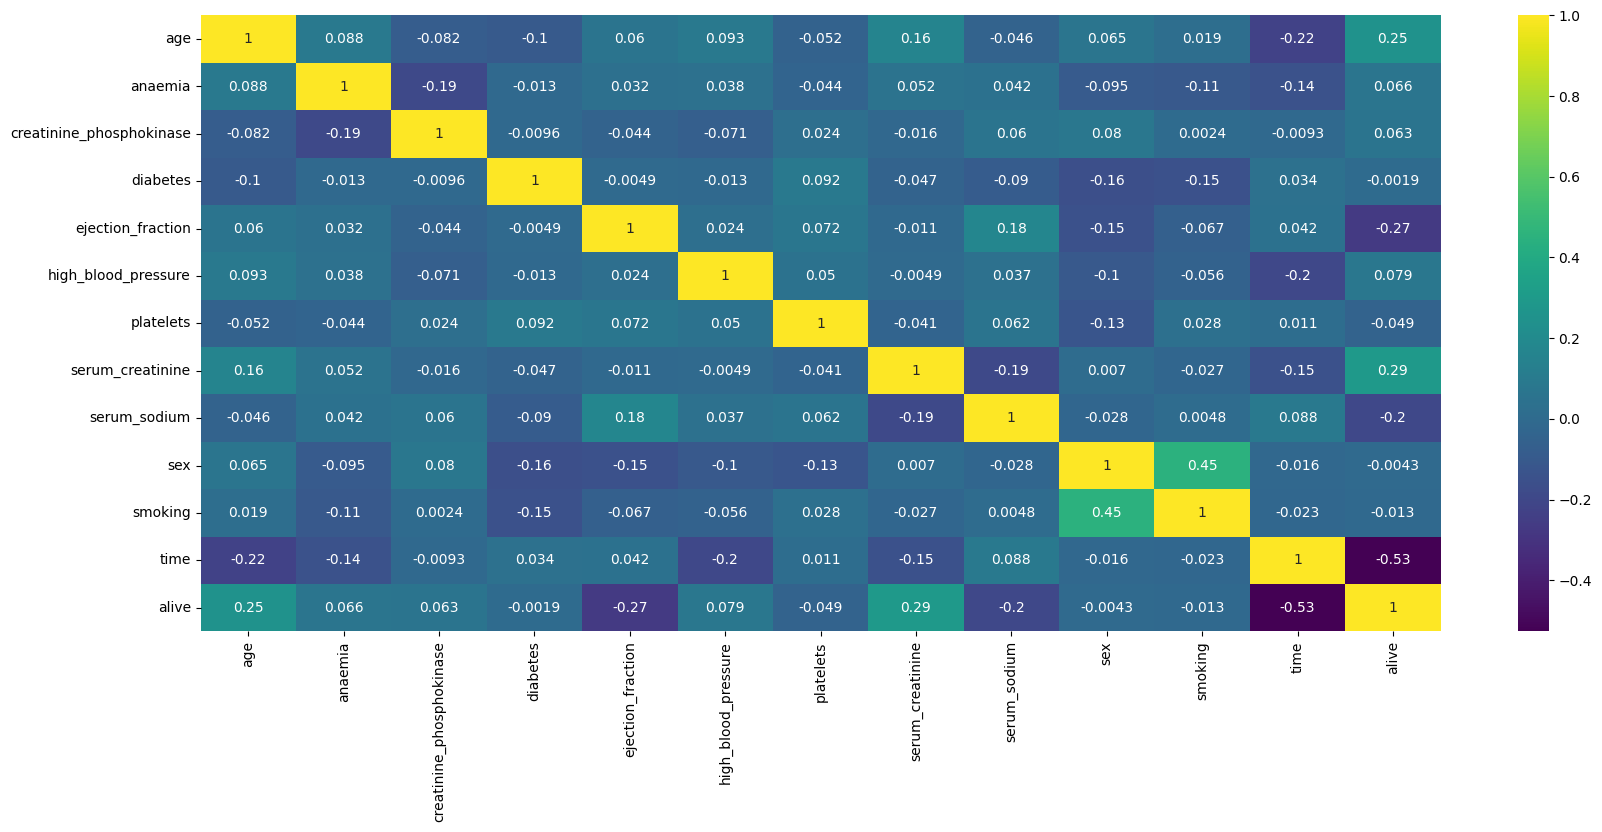

In [26]:
corr = hf.corr()

def subplts(r=1, c=1, fs=(20, 8)):
    return plt.subplots(r, c, figsize=fs)
fig, ax = subplts()

dataplot = sns.heatmap(data=corr, annot=True, ax=ax, cmap="viridis")
plt.show()

We will not use the feature __`time`__ because it has no precise meaning, even if the correlation map shows that the time feature and the target are correlated.

In [27]:
x = hf.drop(columns = ["alive","time"])
y = hf["alive"]
features_names = x.columns

In [28]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

Feature ranking:
1. feature 4 (0.179926)
2. feature 7 (0.170559)
3. feature 0 (0.140676)
4. feature 8 (0.118325)
5. feature 2 (0.107790)
6. feature 6 (0.102406)
7. feature 3 (0.043835)
8. feature 10 (0.039155)
9. feature 1 (0.034604)
10. feature 9 (0.033613)
11. feature 5 (0.029111)


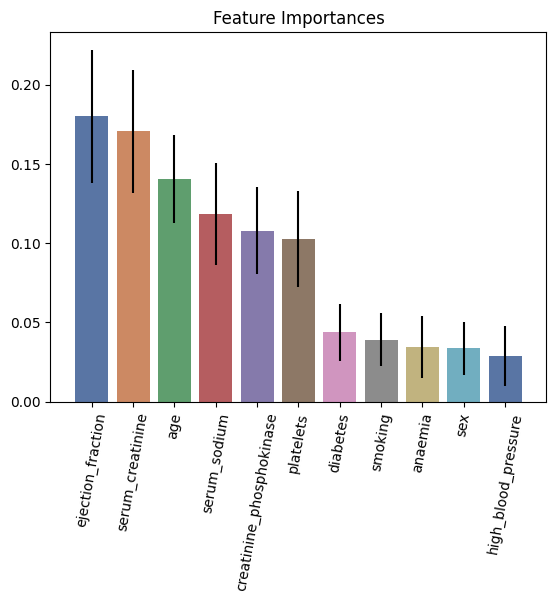

In [29]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature Importances")
sns.barplot(x=features_names[indices].to_numpy(), y=importances[indices], palette="deep",yerr=std[indices])
plt.xticks(range(x.shape[1]), features_names[indices].to_numpy(),rotation=80)
plt.xlim([-1, x.shape[1]])
plt.show()

### Data Modeling

#### First, We compared Classifier based on Validation and Training Accuracy

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [31]:
models= [['Logistic Regression',LogisticRegression()],
        ['KNearest Neighbor ',KNeighborsClassifier()],
        ['Decision Tree Classifier ',DecisionTreeClassifier()],
        ['Random Forest Classifier ',RandomForestClassifier()],
        ['Ada Boost ',AdaBoostClassifier()],
        ['SVM ',SVC()],
        ['Gradient Boosting Classifier',GradientBoostingClassifier()]]
print('_______________________________________________________')
models_score = []
for name,model in models:
    
    model = model
    model.fit(x_train,y_train)
    model_pred = model.predict(x_test)
    models_score.append(accuracy_score(y_test,model.predict(x_test)))
    
    print(name)
    print('Validation Acuuracy: ',accuracy_score(y_test,model.predict(x_test)))
    print('Training Accuracy: ',accuracy_score(y_train,model.predict(x_train)))
    print('_______________________________________________________')

_______________________________________________________
Logistic Regression
Validation Acuuracy:  0.75
Training Accuracy:  0.7489539748953975
_______________________________________________________
KNearest Neighbor 
Validation Acuuracy:  0.6333333333333333
Training Accuracy:  0.7656903765690377
_______________________________________________________
Decision Tree Classifier 
Validation Acuuracy:  0.6833333333333333
Training Accuracy:  1.0
_______________________________________________________
Random Forest Classifier 
Validation Acuuracy:  0.7666666666666667
Training Accuracy:  1.0
_______________________________________________________
Ada Boost 
Validation Acuuracy:  0.75
Training Accuracy:  0.8493723849372385
_______________________________________________________
SVM 
Validation Acuuracy:  0.7166666666666667
Training Accuracy:  0.6694560669456067
_______________________________________________________
Gradient Boosting Classifier
Validation Acuuracy:  0.8
Training Accuracy:  0.97

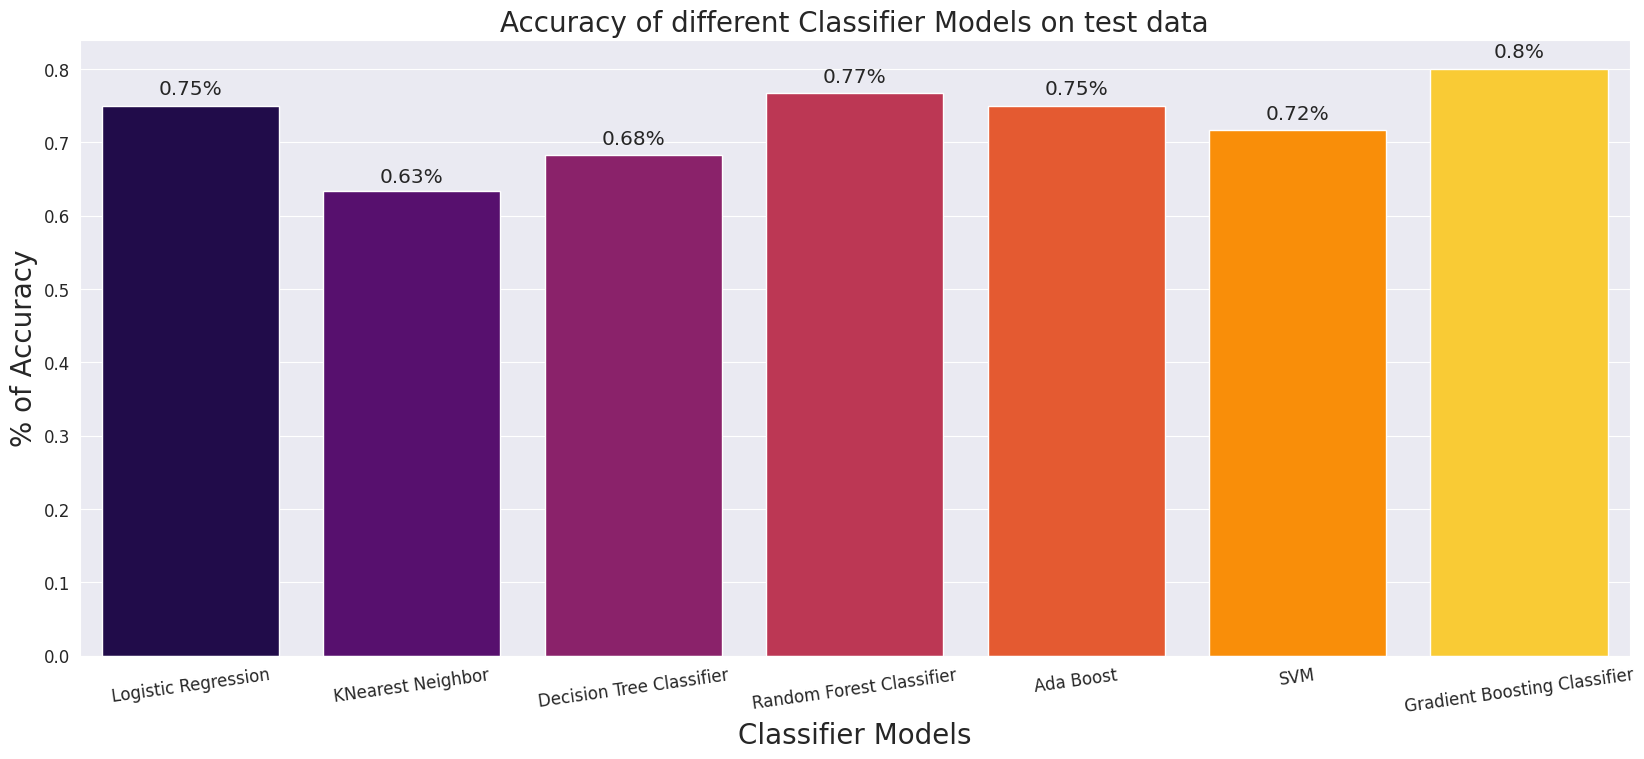

In [32]:
models_names = [
    'Logistic Regression',
'KNearest Neighbor',
'Decision Tree Classifier',
'Random Forest Classifier',
'Ada Boost',
'SVM',
'Gradient Boosting Classifier']

plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=models_names, y=models_score, palette = "inferno", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models on test data', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

#### Now, Comparing Classifiers using their Classification Report, Confusion Matrix, Precision Recall Curve, and ROC (Receiver Operating Characteristic) Curve.

In [33]:
def comp_classifier(model):
    model.fit(x_train, y_train)
    model_test_preds = model.predict(x_test)
    
    print(f"{model} Accuracy score: ", accuracy_score(y_test, model_test_preds))
    print(f"\n{model} Classification report:\n", classification_report(y_test, model_test_preds, digits=6))
    
    # confusion matrix
    cf_mat = confusion_matrix(y_test, model_test_preds)
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(data=cf_mat, annot=True, ax=ax)
    plt.show()

LogisticRegression(random_state=42) Accuracy score:  0.75

LogisticRegression(random_state=42) Classification report:
               precision    recall  f1-score   support

           0   0.759259  0.953488  0.845361        43
           1   0.666667  0.235294  0.347826        17

    accuracy                       0.750000        60
   macro avg   0.712963  0.594391  0.596593        60
weighted avg   0.733025  0.750000  0.704393        60



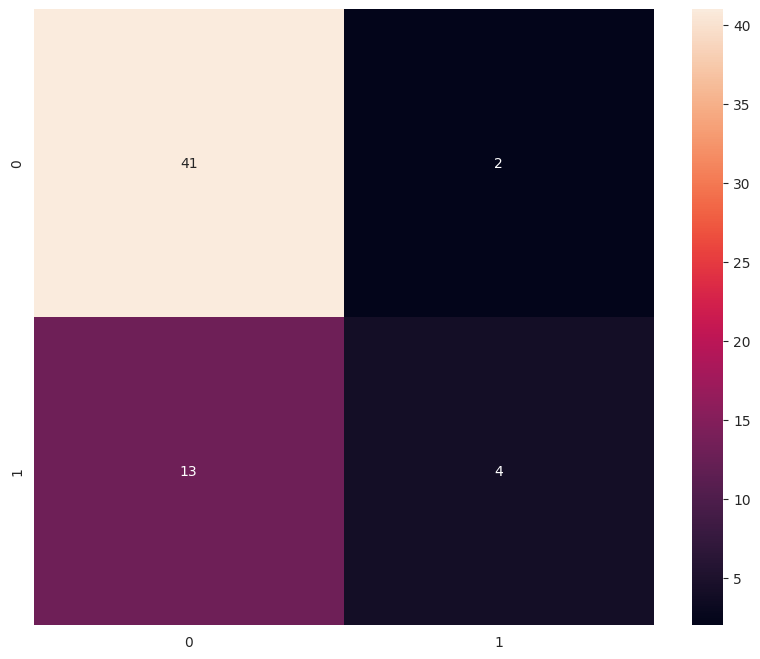

KNeighborsClassifier() Accuracy score:  0.6333333333333333

KNeighborsClassifier() Classification report:
               precision    recall  f1-score   support

           0   0.723404  0.790698  0.755556        43
           1   0.307692  0.235294  0.266667        17

    accuracy                       0.633333        60
   macro avg   0.515548  0.512996  0.511111        60
weighted avg   0.605619  0.633333  0.617037        60



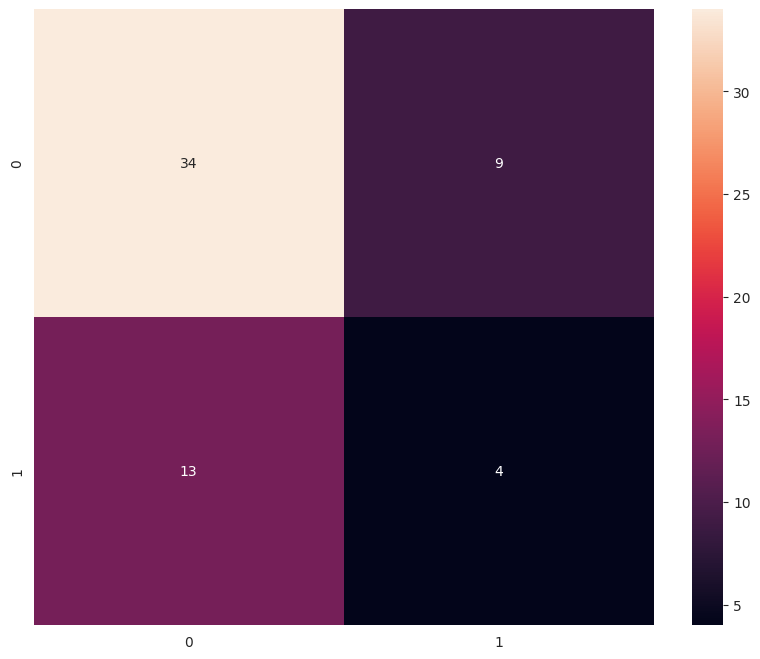

DecisionTreeClassifier(random_state=42) Accuracy score:  0.6666666666666666

DecisionTreeClassifier(random_state=42) Classification report:
               precision    recall  f1-score   support

           0   0.794872  0.720930  0.756098        43
           1   0.428571  0.529412  0.473684        17

    accuracy                       0.666667        60
   macro avg   0.611722  0.625171  0.614891        60
weighted avg   0.691087  0.666667  0.676080        60



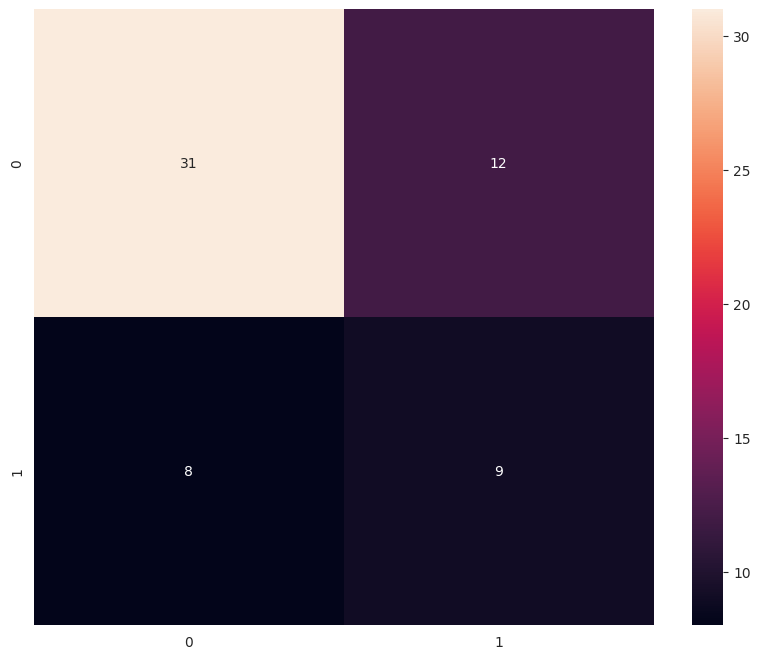

RandomForestClassifier(random_state=42) Accuracy score:  0.75

RandomForestClassifier(random_state=42) Classification report:
               precision    recall  f1-score   support

           0   0.818182  0.837209  0.827586        43
           1   0.562500  0.529412  0.545455        17

    accuracy                       0.750000        60
   macro avg   0.690341  0.683311  0.686520        60
weighted avg   0.745739  0.750000  0.747649        60



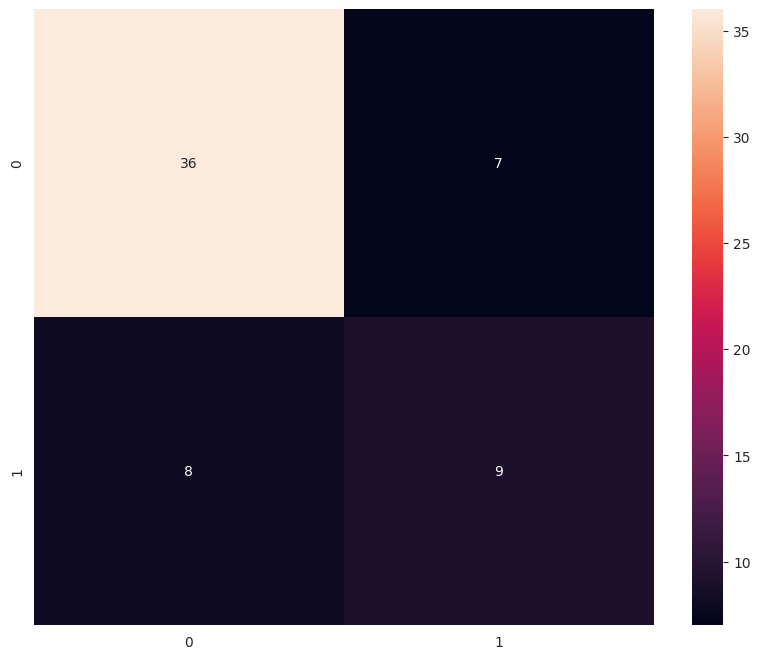

AdaBoostClassifier(random_state=42) Accuracy score:  0.75

AdaBoostClassifier(random_state=42) Classification report:
               precision    recall  f1-score   support

           0   0.791667  0.883721  0.835165        43
           1   0.583333  0.411765  0.482759        17

    accuracy                       0.750000        60
   macro avg   0.687500  0.647743  0.658962        60
weighted avg   0.732639  0.750000  0.735316        60



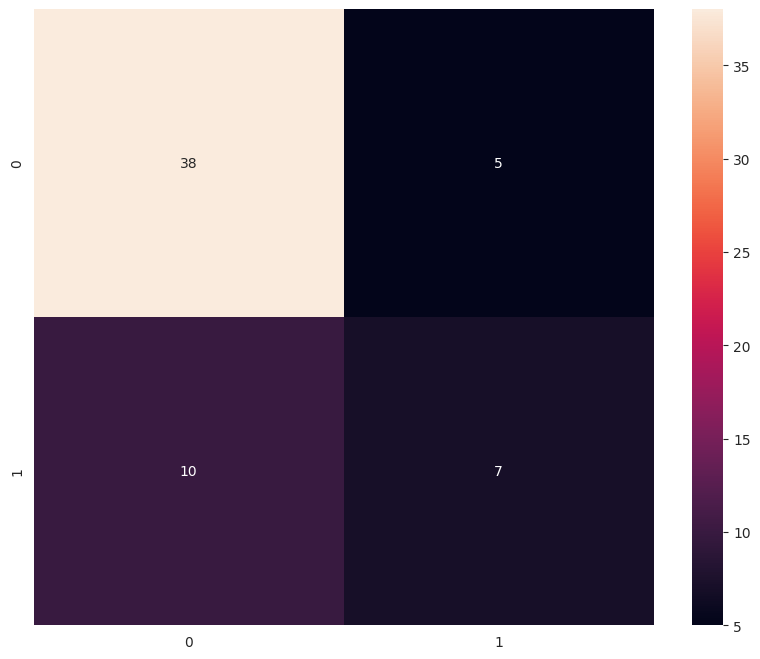

SVC() Accuracy score:  0.7166666666666667

SVC() Classification report:
               precision    recall  f1-score   support

           0   0.716667  1.000000  0.834951        43
           1   0.000000  0.000000  0.000000        17

    accuracy                       0.716667        60
   macro avg   0.358333  0.500000  0.417476        60
weighted avg   0.513611  0.716667  0.598382        60



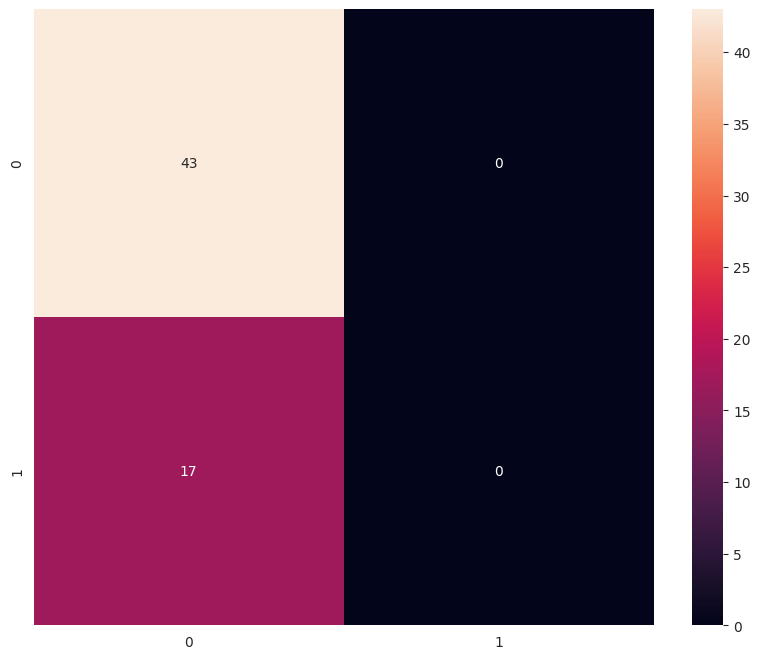

GradientBoostingClassifier(random_state=42) Accuracy score:  0.8

GradientBoostingClassifier(random_state=42) Classification report:
               precision    recall  f1-score   support

           0   0.844444  0.883721  0.863636        43
           1   0.666667  0.588235  0.625000        17

    accuracy                       0.800000        60
   macro avg   0.755556  0.735978  0.744318        60
weighted avg   0.794074  0.800000  0.796023        60



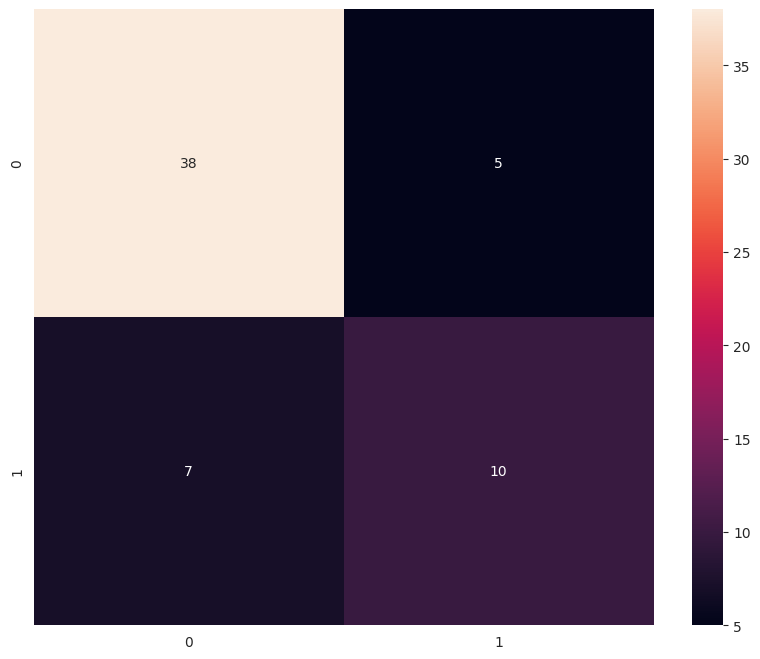

In [34]:
models = [
    LogisticRegression(random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    SVC(),
    GradientBoostingClassifier(random_state=42)
]

for model in models:
    comp_classifier(model)

GradientBoostingClassifier(random_state=42) Accuracy score:  0.8

GradientBoostingClassifier(random_state=42) Classification report:
               precision    recall  f1-score   support

           0   0.844444  0.883721  0.863636        43
           1   0.666667  0.588235  0.625000        17

    accuracy                       0.800000        60
   macro avg   0.755556  0.735978  0.744318        60
weighted avg   0.794074  0.800000  0.796023        60



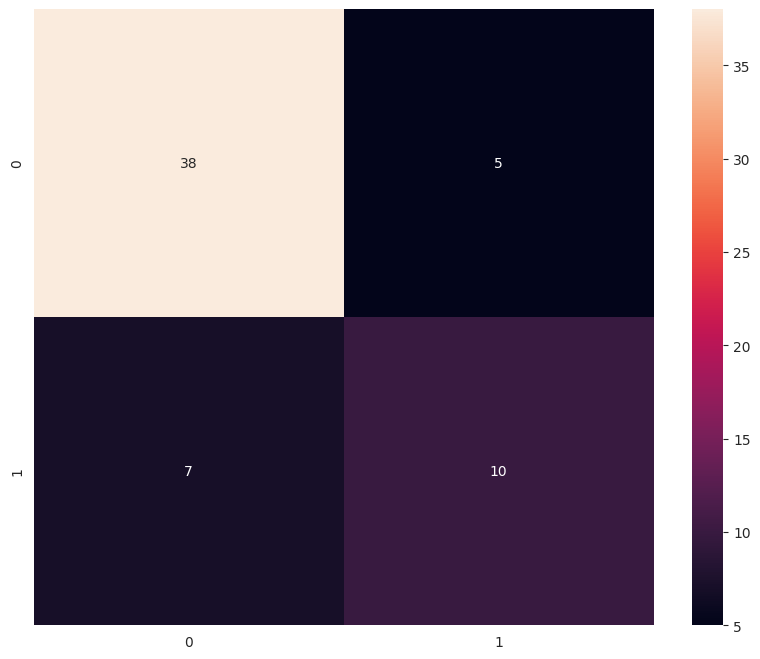

In [35]:
cl1 = AdaBoostClassifier(random_state=42)
cl2 = SVC(probability=True)
cl3 = GradientBoostingClassifier()

model_final = VotingClassifier(estimators=[
    ("ada_boost", cl1), ("svc", cl2), ("grad_boost", cl3)
], voting="soft")

comp_classifier(model)


####  On the test set, `GradientBoostingClassifier(random_state=42)` performs better than the other classifiers which has Average Precision 84% and Average Recall 88%

In [36]:
BestClassifier = GradientBoostingClassifier(random_state=42)
BestClassifier.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

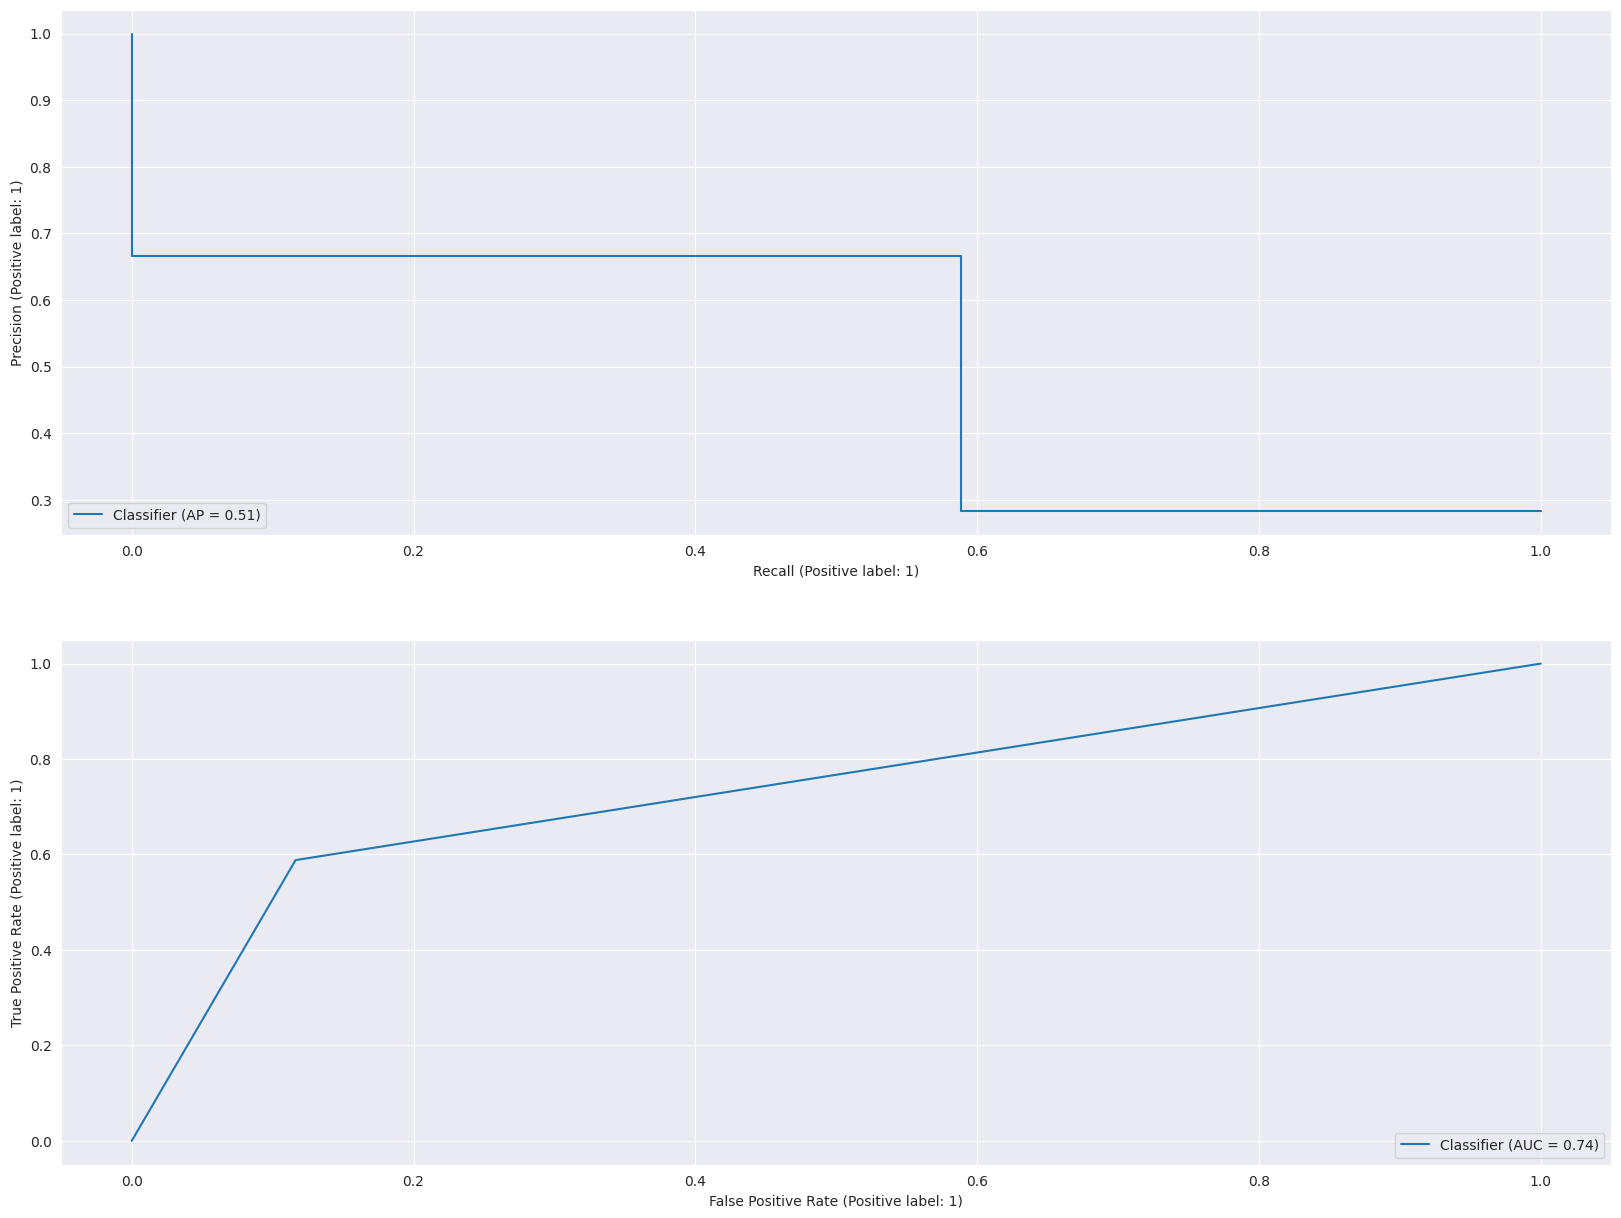

In [37]:
pred = BestClassifier.predict(x_test)

fig, ax = plt.subplots(2, 1, figsize=(20, 15))
precision_recall = PrecisionRecallDisplay.from_predictions(y_test, pred, ax=ax[0])
roc = RocCurveDisplay.from_predictions(y_test, pred, ax=ax[1])

plt.show()

#### Here are the Precision Recall Curve and ROC Curve for the top classifier we have so far discovered (with Area Under Curve = 0.74)

### Model Deploying

In [38]:
gboost = GradientBoostingClassifier()
gboost.fit(x_train,y_train)
gboost_pred = gboost.predict(x_test)

In [39]:
import pickle

file = open('gboost.pkl','wb')
pickle.dump(gboost, file)
file.close()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4a7d20fb-5041-45ee-9490-98fd0e61a7b9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>